In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset 
load diabetes_data

In [2]:
df = pd.read_csv('diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Divide the dataset into train and test datasets

In [3]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Glucose', 'BMI']],df['Outcome'], test_size=0.2, random_state=49)

In [4]:
print(df.corr())
print(df.Outcome.value_counts())
print(pd.DataFrame(yTest).Outcome.value_counts())
print(pd.DataFrame(yTrain).Outcome.value_counts())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xTrain=scaler.fit_transform(xTrain)
xTest=scaler.transform(xTest)



## Implement the following functions to create your own logistic regression algorithm from scratch.
#### Feel free to use more additinal functions in your implementation.

In [6]:
def sigmoid(X):
    
    """
    :param X: data matrix (2 dimensional np.array)
    
    """
    
    y=np.exp(X)/(1 + np.exp(X))
    return y


In [7]:
def logistic_func(beta, X):
    """
    :param X: data matrix (2 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    
    """
    col_ones = np.ones([X.shape[0], 1])
    X= np.hstack((col_ones, X))
    h=sigmoid(np.dot(X, beta))
    return h

In [8]:
def gradient(beta, X, Y):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: np.array i.e. gradient according to the data
    
    """
    z=np.subtract(logistic_func(beta, X),Y)
    col_ones = np.ones([X.shape[0], 1])
    X1= np.hstack((col_ones, X))
    g=np.dot(z.T,X1) 
    return g



In [9]:
def cost_func(X, Y, beta):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: numberic value of the cost function
    
    """
    cost=(1/(X.shape[1] + 1)) * (-Y * np.log(logistic_func(beta, X)) - (1 - Y) * np.log(1 - logistic_func(beta, X)))
    return cost
 

In [10]:
def gradient_descent(X, Y, epsilon=1e-6, step_size=1e-4, max_steps=2000):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param epsilon: threshold for a change in cost function value
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    
    """
    n=1
    
    beta=np.zeros(X.shape[1]+1)
    while n < max_steps:
        beta=beta-(step_size * (gradient(beta, X, Y)  + ((epsilon/(X.shape[1] + 1))) * beta ))
        if gradient(beta, X, Y).all()==0:
            n=max_steps
        else:
            n+=1
    return beta


## Run logistic regression using the features of your choice and using "Outcome" as a target variable

In [11]:
print(gradient_descent(xTrain,yTrain, epsilon=0.1))
pred=logistic_func(gradient_descent(xTrain,yTrain, epsilon=0.1), xTest)

for i in range(len(pred)):
    if pred[i]<0.5:
        pred[i]=0
    else:
        pred[i]=1
pred

[-0.91472957  1.06620893  0.69018442]


array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0.])

## Use the logistic regression available in Sklearn on the same data.

In [12]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(max_iter=2000, C=0.1)


y=logreg.fit(xTrain,yTrain)


y_pred=logreg.predict(xTest)

print(logreg.coef_, logreg.intercept_)
#print(logreg.predict_proba(xTest))
y_pred

[[0.9502182  0.61040068]] [-0.87748576]


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [13]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(yTest, y_pred)
cnf_matrix

array([[85,  6],
       [33, 30]], dtype=int64)

In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(yTest, pred)
cnf_matrix

array([[83,  8],
       [30, 33]], dtype=int64)

In [15]:
print("Accuracy:",metrics.accuracy_score(yTest, pred))
print("Precision:",metrics.precision_score(yTest, pred))
print("Recall:",metrics.recall_score(yTest, pred))

Accuracy: 0.7532467532467533
Precision: 0.8048780487804879
Recall: 0.5238095238095238


In [16]:
print("Accuracy:",metrics.accuracy_score(yTest, y_pred))
print("Precision:",metrics.precision_score(yTest, y_pred))
print("Recall:",metrics.recall_score(yTest, y_pred))

Accuracy: 0.7467532467532467
Precision: 0.8333333333333334
Recall: 0.47619047619047616


## Extra: try to plot the results of your algorithm i.e. a scatter plot of points classified into 2 classes in different colors.

In [17]:
from sklearn.model_selection import train_test_split
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(df[['Glucose']],df['Outcome'], test_size=0.2, random_state=49)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xTrain1=scaler.fit_transform(xTrain1)
xTest1=scaler.transform(xTest1)



In [19]:
print(gradient_descent(xTrain1,yTrain1, epsilon=0.1))
pred1=logistic_func(gradient_descent(xTrain1,yTrain1, epsilon=0.1), xTest1)

for i in range(len(pred1)):
    if pred1[i]<0.5:
        pred1[i]=0
    else:
        pred1[i]=1
pred1

[-0.84668671  1.16257299]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0.])

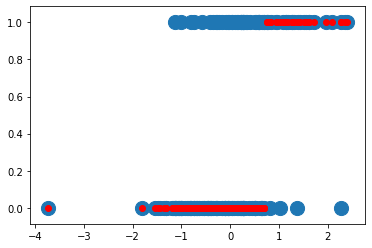

In [20]:
import matplotlib.pyplot as plt
plt.scatter(xTest1, yTest1,  s=200)

plt.scatter(xTest1, pred1, c='r')
plt.show()

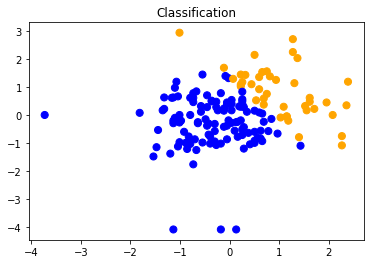

In [22]:

plt.scatter(xTest[:, 0], xTest[:, 1], c=['orange' if y_i > 0 else 'blue' for y_i in pred], s=50)
#plt.scatter(xTest[:, 0], xTest[:, 1], c=['red' if y_i > 0 else 'black' for y_i in yTest ],marker="x", s=10)
plt.title("Classification")

plt.show()